In [204]:
#Import Libraries

import pandas as pd
import os
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [205]:
# In this folder, all the csv's are present

folder_path = 'Invoices' 

In [206]:
# Empty Dataframe

combined_df = pd.DataFrame()

In [207]:
# Combining all the files

for filename in os.listdir(folder_path): 
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        combined_df = pd.concat([combined_df, df], axis=0)


In [208]:
# To combine the file

combined_df.to_csv('combined_data.csv', index=False)


In [209]:
# Loading the csv file

data = pd.read_csv('combined_data.csv',low_memory=False)

In [210]:
# To know about data 

data.head()

,Invoice ID,Invoice Status,Customer ID,Due Date,PurchaseOrder,SubTotal,Total,Balance,Adjustment,Expected Payment Date,...,Product ID,SKU,Customer Name,Invoice Date,Invoice Number,Account,Account Code,Sales person,Item Type,Usage Unit
0,209792000000766001,Draft,209792000000762025,2021-01-01,NaN,341.3,341.3,341.3,0.0,NaN,...,2.097920e+17,15YO5QEVG7,THE PUNJABI RASOI (ARK),2021-01-01,INV-004181,Sales,NaN,NaN,NaN,1 Kg
1,209792000000766001,Draft,209792000000762025,2021-01-01,NaN,341.3,341.3,341.3,0.0,NaN,...,2.097920e+17,TBAA4GGYQR,THE PUNJABI RASOI (ARK),2021-01-01,INV-004181,Sales,NaN,NaN,NaN,1 Kg
2,209792000000766001,Draft,209792000000762025,2021-01-01,NaN,341.3,341.3,341.3,0.0,NaN,...,2.097920e+17,WIQ4LRIL33,THE PUNJABI RASOI (ARK),2021-01-01,INV-004181,Sales,NaN,NaN,NaN,1 Kg
3,209792000000766001,Draft,209792000000762025,2021-01-01,NaN,341.3,341.3,341.3,0.0,NaN,...,2.097920e+17,NaN,THE PUNJABI RASOI (ARK),2021-01-01,INV-004181,Sales,NaN,NaN,NaN,NaN
4,209792000000766001,Draft,209792000000762025,2021-01-01,NaN,341.3,341.3,341.3,0.0,NaN,...,2.097920e+17,W4LGBYT5PD,THE PUNJABI RASOI (ARK),2021-01-01,INV-004181,Sales,NaN,NaN,NaN,1 Kg


In [211]:
#Shape of the data

data.shape

(210442, 28)

In [212]:
#To check the null values

data.isnull().sum()

Invoice ID                    0
Invoice Status                0
Customer ID                   0
Due Date                      0
PurchaseOrder            210442
SubTotal                      0
Total                         0
Balance                       0
Adjustment                    0
Expected Payment Date    210442
Last Payment Date         43599
Item Name                     1
Item Desc                210436
Quantity                      0
Discount                      0
Discount Amount               0
Item Total                    0
Item Price                    0
Product ID                    1
SKU                        4167
Customer Name                 0
Invoice Date                  0
Invoice Number                0
Account                       0
Account Code             210442
Sales person             210442
Item Type                210442
Usage Unit                 4145
dtype: int64

In [213]:
# the columns to drop which are not important

columns_to_drop = ['PurchaseOrder','Expected Payment Date','Item Desc','SubTotal','Discount','Discount Amount',
                   'Account Code','Sales person','Item Type','Adjustment','Balance']
data = data.drop(columns_to_drop, axis=1)


In [214]:
#Replace the null values

data['Usage Unit'].fillna(data['Usage Unit'].sample(n=1).values[0], inplace=True)
data.dropna(subset=['Item Name'], inplace=True)
data.drop('SKU', axis=1, inplace=True)

In [215]:
#Replace the null values

data['Due Date'] = pd.to_datetime(data['Due Date'])
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'])

difference = timedelta(days=10)

data['Last Payment Date'] = data['Last Payment Date'].fillna(data['Due Date'] + difference)

In [216]:
#Check the null values after replacing

data.isnull().sum()

Invoice ID           0
Invoice Status       0
Customer ID          0
Due Date             0
Total                0
Last Payment Date    0
Item Name            0
Quantity             0
Item Total           0
Item Price           0
Product ID           0
Customer Name        0
Invoice Date         0
Invoice Number       0
Account              0
Usage Unit           0
dtype: int64

In [217]:
# Taking out month from the Date & adding as a new column

data['Month'] = pd.to_datetime(data['Invoice Date']).dt.month
data['Year'] = pd.to_datetime(data['Last Payment Date']).dt.year

In [233]:
#Checking the uniques values in the Columns

print(data['Year'].unique())
print(data['Invoice Status'].unique())
print(data['Usage Unit'].unique())

[2021 2022 2023]
['Draft' 'Closed' 'Overdue']
['1 Kg' '1 Pc' '0.2' '0.5' 'box' '0.05' '0.3' '0.4' 'kg' '0.25 Kg' '25'
 '60']


In [220]:
data.corr()

,Invoice ID,Customer ID,Total,Quantity,Item Total,Item Price,Product ID,Month,Year
Invoice ID,1.000000,0.502221,0.135715,0.011970,0.066347,0.313595,0.503084,0.864751,0.270607
Customer ID,0.502221,1.000000,-0.045044,-0.034142,-0.017159,0.144082,0.309477,0.446160,0.133940
Total,0.135715,-0.045044,1.000000,0.326696,0.383215,0.084091,0.063884,0.121892,-0.019899
Quantity,0.011970,-0.034142,0.326696,1.000000,0.730227,-0.096600,0.028340,0.019155,-0.019094
Item Total,0.066347,-0.017159,0.383215,0.730227,1.000000,0.045311,0.036531,0.057533,-0.009124
Item Price,0.313595,0.144082,0.084091,-0.096600,0.045311,1.000000,0.120429,0.257841,0.092628
Product ID,0.503084,0.309477,0.063884,0.028340,0.036531,0.120429,1.000000,0.583833,0.118663
Month,0.864751,0.446160,0.121892,0.019155,0.057533,0.257841,0.583833,1.000000,0.205762
Year,0.270607,0.133940,-0.019899,-0.019094,-0.009124,0.092628,0.118663,0.205762,1.000000


<AxesSubplot:>

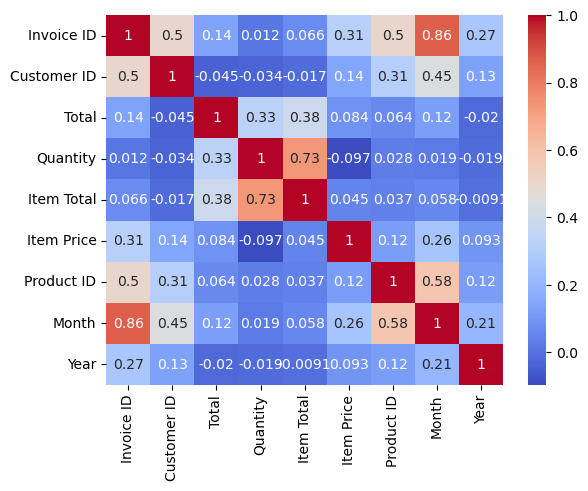

In [221]:

sns.heatmap(data.corr(),cmap='coolwarm', annot=True)

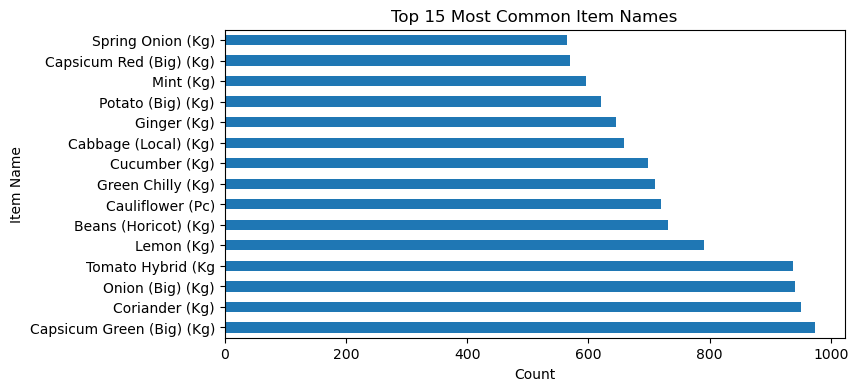

In [222]:
# This graph shows top 20 items 

plt.figure(figsize=(8, 4))
top_n = 15
df['Item Name'].value_counts().nlargest(top_n).plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Item Name')
plt.title(f'Top {top_n} Most Common Item Names')
plt.show()


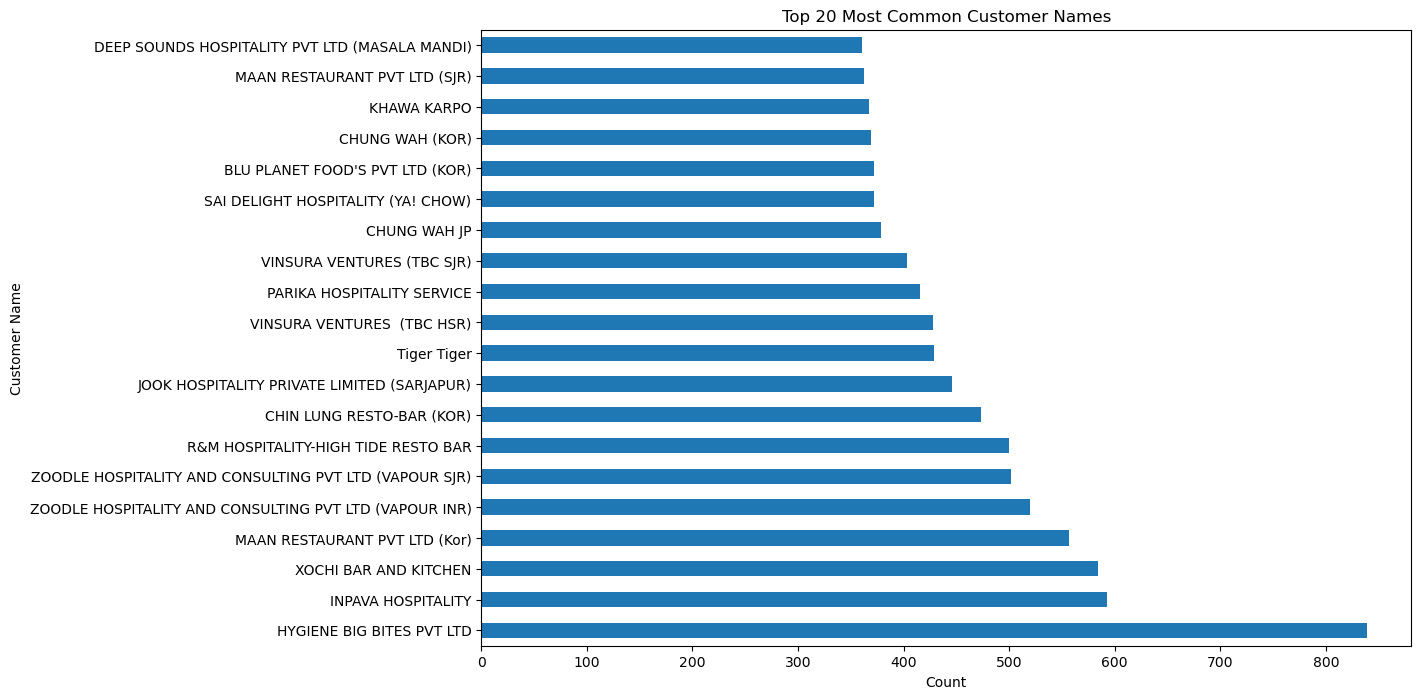

In [223]:
# This graph shows top 20 customers

plt.figure(figsize=(12, 8))
top_n = 20
df['Customer Name'].value_counts().nlargest(top_n).plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Customer Name')
plt.title(f'Top {top_n} Most Common Customer Names')
plt.show()

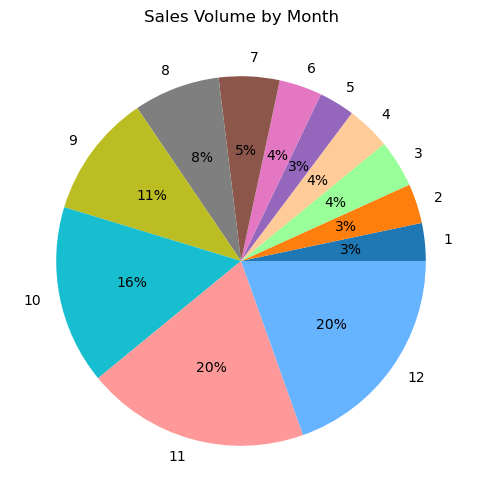

In [225]:
# Total sales for each month in the form of pie chart

monthly_sales = data.groupby('Month')['Item Total'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='pie', autopct='%1.f%%', colors=['#1f77b4', '#ff7f0e',  '#99ff99', '#ffcc99', '#9467bd', 
                                      '#e377c2', '#8c564b', '#7f7f7f', '#bcbd22', '#17becf','#ff9999', '#66b3ff'])
plt.title('Sales Volume by Month')
plt.ylabel('') 
plt.show()

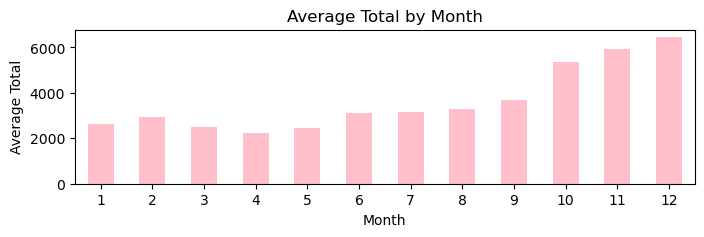

In [226]:
average_total_by_month = data.groupby('Month')['Total'].mean()
plt.figure(figsize=(8, 2))
average_total_by_month.plot(kind='bar', color='pink')
plt.xlabel('Month')
plt.ylabel('Average Total')
plt.title('Average Total by Month')
plt.xticks(rotation=0)
plt.show()


In [230]:
# Saving the data in which we have done the changes

data.to_excel('data.xlsx', index=False)